# Exploratory Data Analysis and Visualization on the countries of the World

There is the dataset of World countries Development and Area wise growth of the country as well as the regions around the globe. In the dataset there are 20 columns including agriculture, services, GDP growth, mortality rate and phone services etc. And the dataset is given for each countries having 227 rows.

In [49]:
import pandas as pd
import missingno as ms


In [50]:
#Lets read out the dataset file first and see some samples of the features
dataset = pd.read_csv('countriesOfTheWorld-WDI.csv')
dataset.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


These all features are related to development of any country, their population plus the Agriculture rate as well. The Death rate is also a colmn in there. Let explore further information related to dataset.
dataset.info()

In [51]:
def function_transpose(file):
    '''
    this function will take a .csv file in the world bank format and transpose it into original format
    '''
    dataset=pd.read_csv(file)
    dataset=dataset.transpose()
    dataset.columns=dataset.iloc[0]
    dataset=dataset.iloc[:-1]
    dataset=dataset.reset_index()
    dataset=dataset.rename(columns={"index": "Year"})
    
    return dataset

In [52]:
file='countriesOfTheWorld-WDI.csv'
function_transpose(file)

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua & Barbuda,Argentina,...,Vanuatu,Venezuela,Vietnam,Virgin Islands,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
0,Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua & Barbuda,Argentina,...,Vanuatu,Venezuela,Vietnam,Virgin Islands,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
1,Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE,SUB-SAHARAN AFRICA,LATIN AMER. & CARIB,LATIN AMER. & CARIB,LATIN AMER. & CARIB,...,OCEANIA,LATIN AMER. & CARIB,ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,OCEANIA,NEAR EAST,NORTHERN AFRICA,NEAR EAST,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA
2,Population,31056997,3581655,32930091,57794,71201,12127071,13477,69108,39921833,...,208869,25730435,84402966,108605,16025,2460492,273008,21456188,11502010,12236805
3,Area (sq. mi.),647500,28748,2381740,199,468,1246700,102,443,2766890,...,12200,912050,329560,1910,274,5860,266000,527970,752614,390580
4,Pop. Density (per sq. mi.),"48,0","124,6","13,8","290,4","152,1","9,7","132,1","156,0","14,4",...,"17,1","28,2","256,1","56,9","58,5","419,9","1,0","40,6","15,3","31,3"
5,Coastline (coast/area ratio),"0,00","1,26","0,04","58,29","0,00","0,13","59,80","34,54","0,18",...,"20,72","0,31","1,05","9,84","47,08","0,00","0,42","0,36","0,00","0,00"
6,Net migration,"23,06","-4,93","-0,39","-20,71","6,6",0,"10,76","-6,15","0,61",...,0,"-0,04","-0,45","-8,94",NaN,"2,98",NaN,0,0,0
7,Infant mortality (per 1000 births),"163,07","21,52",31,"9,27","4,05","191,19","21,03","19,46","15,18",...,"55,16","22,2","25,95","8,03",NaN,"19,62",NaN,"61,5","88,29","67,69"
8,GDP ($ per capita),700.0,4500.0,6000.0,8000.0,19000.0,1900.0,8600.0,11000.0,11200.0,...,2900.0,4800.0,2500.0,17200.0,3700.0,800.0,NaN,800.0,800.0,1900.0
9,Literacy (%),"36,0","86,5","70,0","97,0","100,0","42,0","95,0","89,0","97,1",...,"53,0","93,4","90,3",NaN,"50,0",NaN,NaN,"50,2","80,6","90,7"


# Data Pre-processing

Lets see the missing values first and then fix those outliers. This time I am using a library names "missingno", It will show the missing values in a viusal
effects. We will then analyze the missing values in each features and then try to fix those.

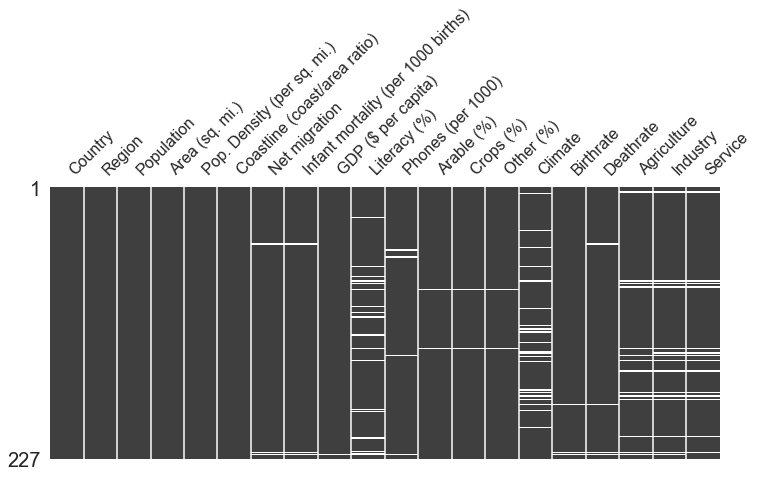

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5));
ms.matrix(dataset, ax=ax, sparkline=False);
plt.savefig('Missing_values.png');
plt.show();


#### The matrix plot is showing the missing values trend in every feature. As it is visible that some of the features, For example Agriculture, Industry and Service; are showing missing values in the same country (the straight line). Let fill these missing feature values with the mean value of the respective column. 

In [54]:
dataset.fillna(dataset.mean(), inplace=True)
columns = dataset[['Net migration', 'Deathrate', 'Agriculture', 'Industry', 'Service', 
                   'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)',
                   'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate']]
def changetype(columns):
    '''
    This function is used in the coversion of the feature column types as 
    some are objects and some are floats. And replace all the , with the
    . in all numeric features for smooth visualizations.
    '''
    for i in columns:
        dataset[i] = dataset[i].astype(str)
        dataset1 = []
        for j in dataset[i]:
            j = j.replace(',','.')
            j = float(j)
            dataset1.append(j)
        dataset[i] = dataset1
changetype(columns)

C:\Users\HP\AppData\Local\Temp/ipykernel_16336/3877371195.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


In [55]:
# trim the spaces after and before the text. It can be seen from the sample 
# data, there are some spaces in some countries names.

dataset['Region'] = dataset.Region.str.strip()
dataset['Country'] = dataset.Country.str.strip()


## Number of countries in each Regions

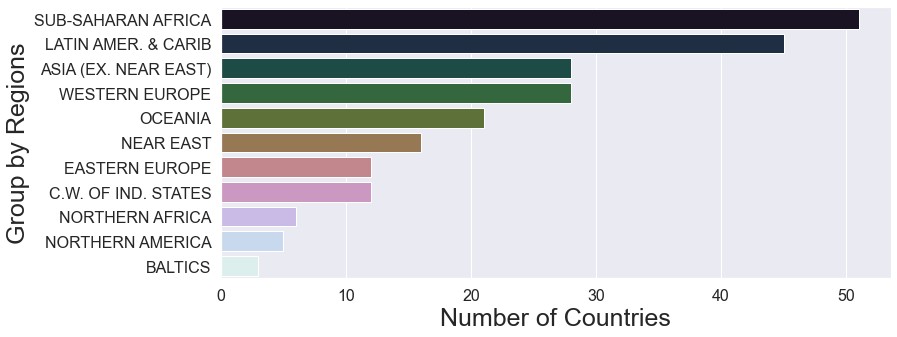

In [56]:
import seaborn as sns

country = dataset['Region'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(y=country.index,x=country.values, palette="cubehelix")
plt.xlabel('Number of Countries', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Group by Regions', fontsize=25)
plt.savefig('Countries-group-by-region.png');
plt.show();

## There are maximum number of countries in first two regions names as Sub-Saharan Africa and Latin Amer & Carib.

### Are these are the same regions which are on tip with respect to their GDP, It can be seen by the box plot with Regions and GDP (that is in dollar per capita)

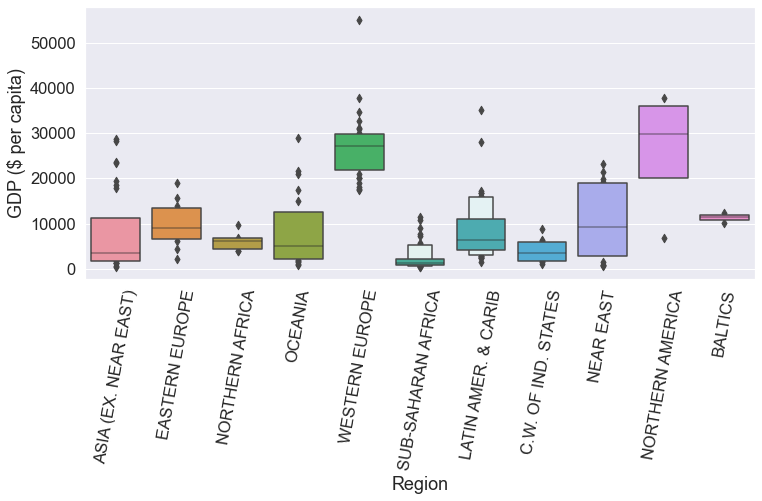

In [57]:
plt.figure(figsize=(12,5))
sns.boxenplot(data=dataset, x='Region', y='GDP ($ per capita)')
sns.set(font_scale = 1.5)

plt.xticks(rotation=80)
plt.savefig('Region-GDP-per-Capita.png');
plt.show()

#### No, Sub-Saharan Africa and Latin Amer & Carib Regions are not on top but Latin Amer & Carib have some outliers. Let see which country is this outliers in this region. But Firstly as expected The Northern America and Western Europe have highest median values.

In [58]:
dataset[dataset['Region'] == 'LATIN AMER. & CARIB'].nlargest(1, 'GDP ($ per capita)')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,"173,4","61,07",18.75,8.19,35000.0,98.0,836.3,3.85,0.0,96.15,2.0,12.74,4.89,0.014,0.032,0.954


Cayman Island is having the highest GDP as it can be seen from the data.

#### We can also see are these features in the dataset, are correlated or have some relationship. It is possible using the corr() function.

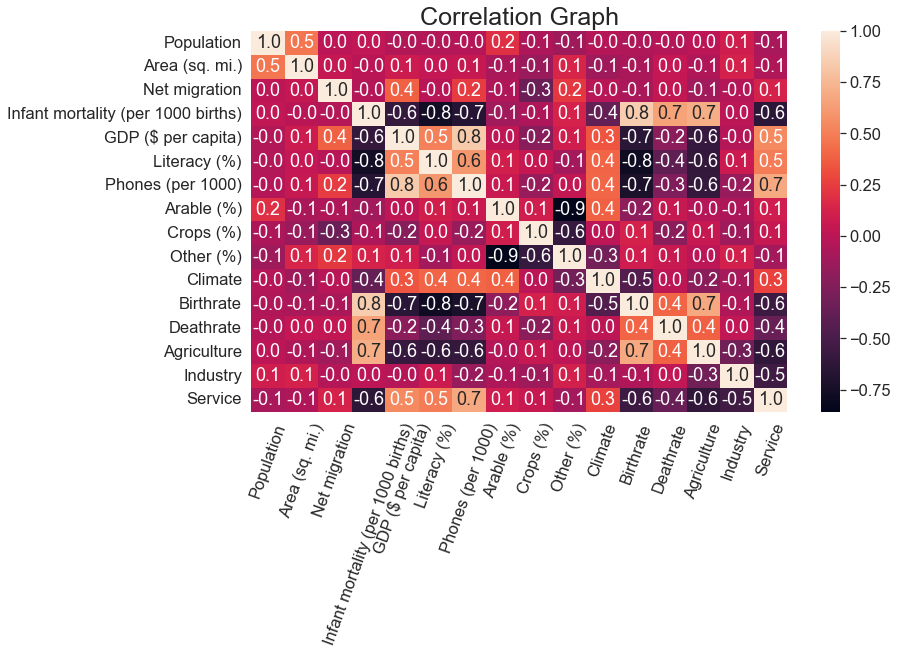

In [59]:
fig , ax = plt.subplots(figsize=(12,7))
sns.heatmap(dataset.corr(),annot=True,fmt=".1f")
plt.title("Correlation Graph", fontsize=25)
plt.xticks(rotation=70)
plt.savefig('Region-GDP-per-Capita.png');
plt.show()

#### Some of the features have very strong correlation for example The feature is maximum correlated with the GDP, Literacy rate and as well as with the Phones. Let see is there any relationship of the GDP Feature that is per Capital given, with the some other features. Either it is positive or Negative Correlated, We can explore and visualize in a better way using the pair plot.

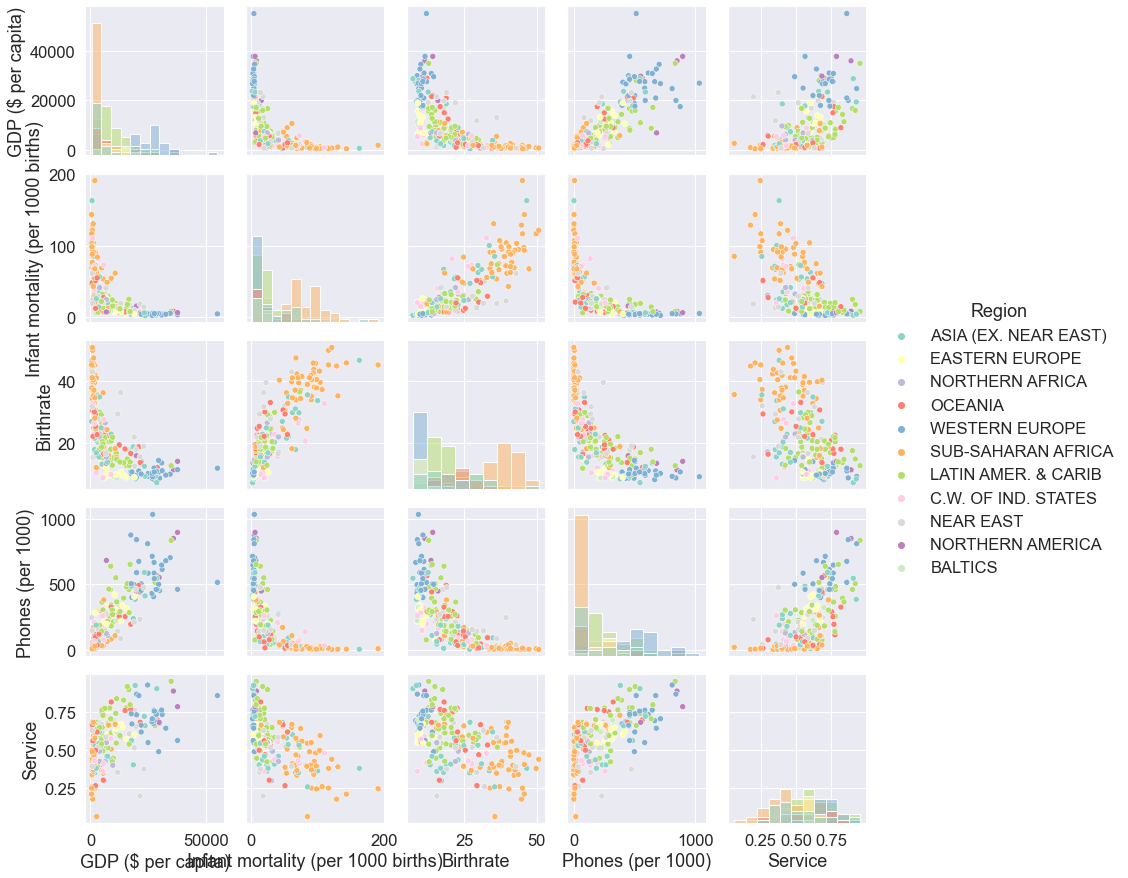

In [60]:
x = dataset.loc[:,["Region","GDP ($ per capita)","Infant mortality (per 1000 births)","Birthrate","Phones (per 1000)","Service"]]
sns.pairplot(x, hue="Region",palette='Set3', diag_kind='hist')

plt.savefig('visualize in a better way using the pair plot.png');
plt.show()

#### There is a strong correlation of GDP with the Phones (that is given per 1000 meters). And there is also a strong relationship between the mortality rate and the birth rate. Let explore both of these analysis separately with the help of jointplot. As it will show us the trend using Hex or scatter and Bar plot on the edges as well.

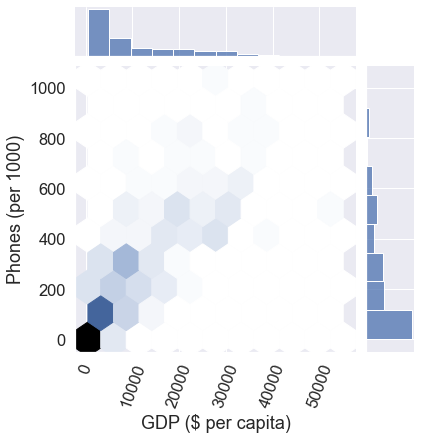

In [61]:
sns.jointplot(x='GDP ($ per capita)', y='Phones (per 1000)', kind='hex', data=dataset)
sns.set(font_scale = 1.2)
plt.xticks(rotation=70)
plt.show()

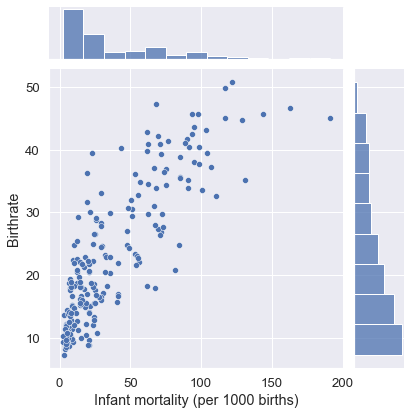

In [62]:
sns.jointplot(x='Infant mortality (per 1000 births)', y='Birthrate', kind='scatter', data=dataset)
sns.set(font_scale = 1.4)

plt.show()

There are the important features which we can extract out from the dataset of this more than 12 features, these are Agriculture, Services and Industry. These are the 3 sectors we can analyze the trend in each region separately. 
I also wanted to analyze the way how different sectors are distributed in each region, and which are the top countries in each of the 3 sectors (Agriculture, Service, Industry).

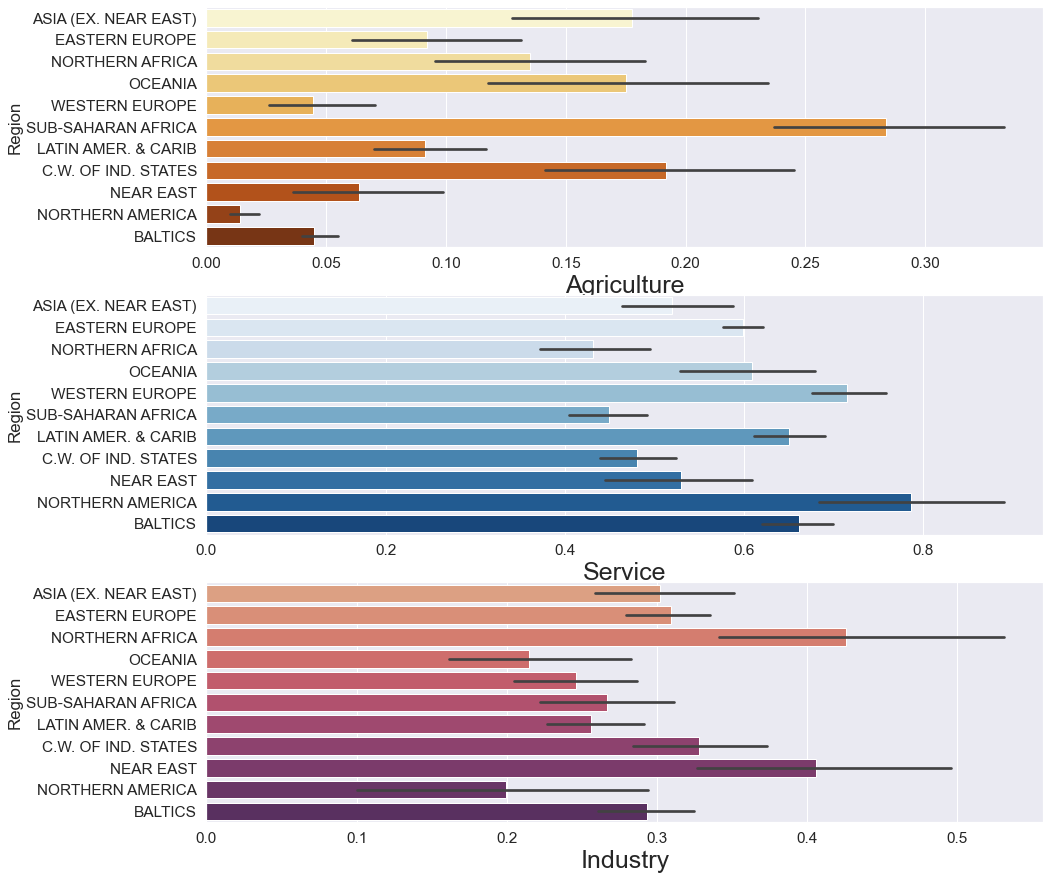

In [63]:
f = plt.figure(figsize=(15,15))
axis1 = f.add_subplot(311)
axis2 = f.add_subplot(312)
axis3 = f.add_subplot(313)

sns.barplot(data=dataset, x='Agriculture', y='Region', ax=axis1,palette="YlOrBr")
sns.barplot(data=dataset, x='Service', y='Region', ax=axis2, palette="Blues")
sns.barplot(data=dataset, x='Industry', y='Region', ax=axis3, palette="flare")

axis1.set_xlabel('Agriculture', fontsize=25)
axis2.set_xlabel('Service', fontsize=25)
axis3.set_xlabel('Industry', fontsize=25)
sns.set(font_scale = 1.5)
plt.show()

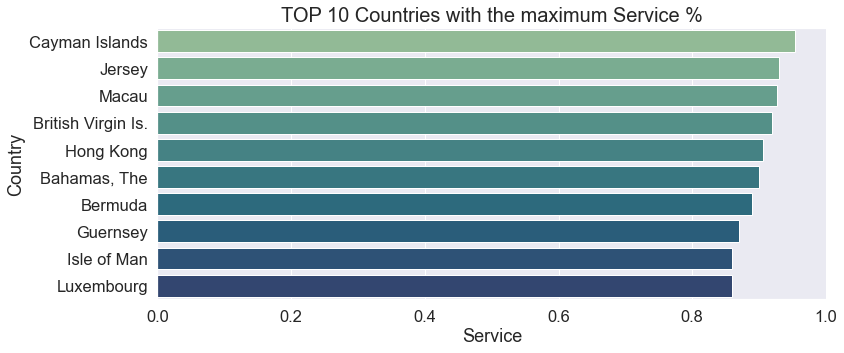

In [64]:
plt.figure(figsize=(12,5))
sns.barplot(data = dataset.nlargest(10, 'Service'), y = 'Country', x = 'Service', palette='crest')
plt.title("TOP 10 Countries with the maximum Service %", size=20)
sns.set(font_scale = 1.5)

plt.show()

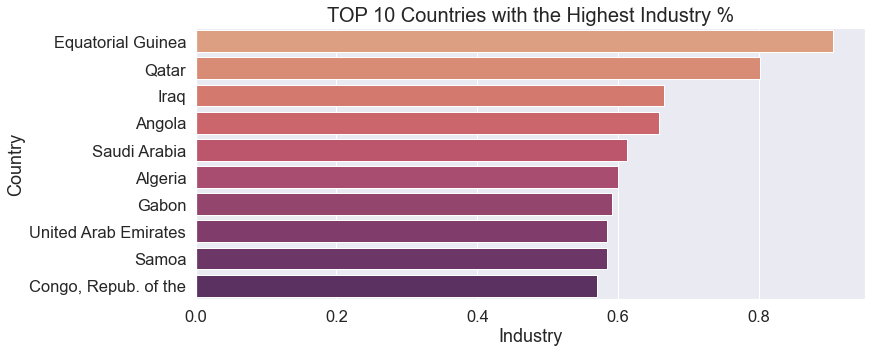

In [65]:
plt.figure(figsize=(12,5))
sns.barplot(data = dataset.nlargest(10, 'Industry'), y = 'Country', x = 'Industry', palette='flare')
plt.title("TOP 10 Countries with the Highest Industry %", size=20)
sns.set(font_scale = 1.5)
plt.show()

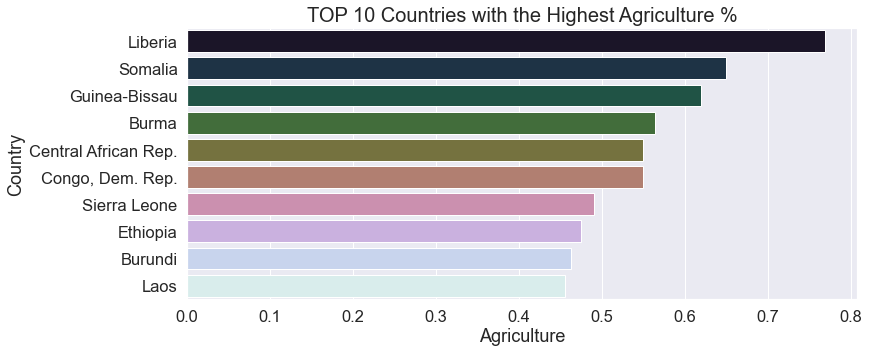

In [66]:
plt.figure(figsize=(12,5))
sns.barplot(data = dataset.nlargest(10, 'Agriculture'), y = 'Country', x = 'Agriculture', palette='cubehelix')
plt.title("TOP 10 Countries with the Highest Agriculture %", size=20)
plt.show()

# Conclusion: 

There is a saying in a book of Hans Rosling that the mortality rate of those counties which have high GDP value, are very low. We can analyse that using this dataset as we have both the features of this saying i.e., mortality and GDP per capita.

<Figure size 1080x864 with 0 Axes>

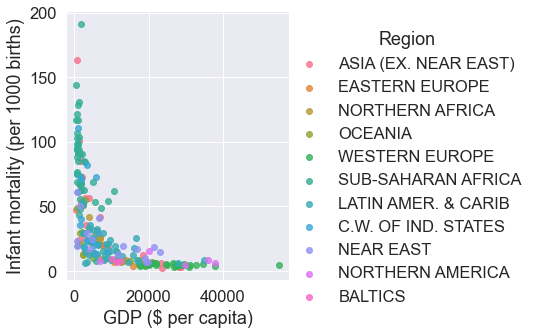

In [67]:
plt.figure(figsize=(15,12));
sns.lmplot(x='GDP ($ per capita)', y='Infant mortality (per 1000 births)', data=dataset, fit_reg=False, hue = 'Region');
plt.show();

Yes it was right, high GDP countries keeps the infant mortality very low.